In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = df.drop('target', axis=1)
y = df.target

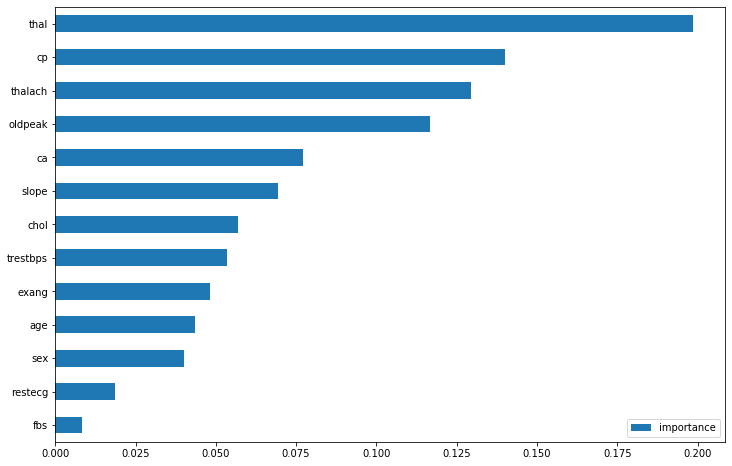

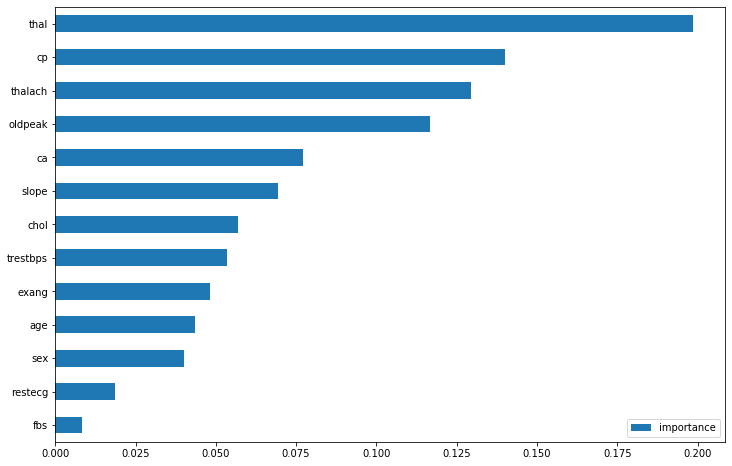

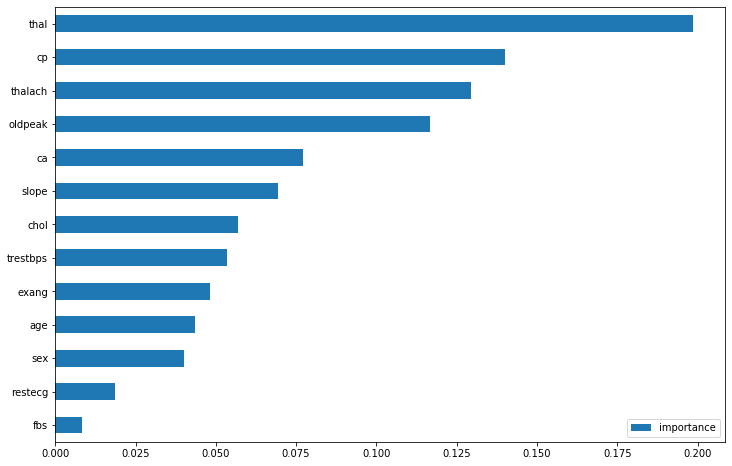

In [6]:
for i in range(3):
    np.random.seed(0)
    rf = RandomForestClassifier(10, max_depth=5)
    rf.fit(X, y)
    imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
    imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [2]:
df = pd.read_csv('data/training_mush.csv')

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
X = df.drop('class', axis=1)

In [7]:
y = df['class']

In [9]:
clf = RandomForestClassifier(random_state=0)
params = {
    'n_estimators': range(10, 51, 10),
    'max_depth': range(1, 13, 2),
    'min_samples_leaf': range(1, 7),
    'min_samples_split': range(2, 10, 2)
}

In [10]:
search = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1)

In [13]:
search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [14]:
search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

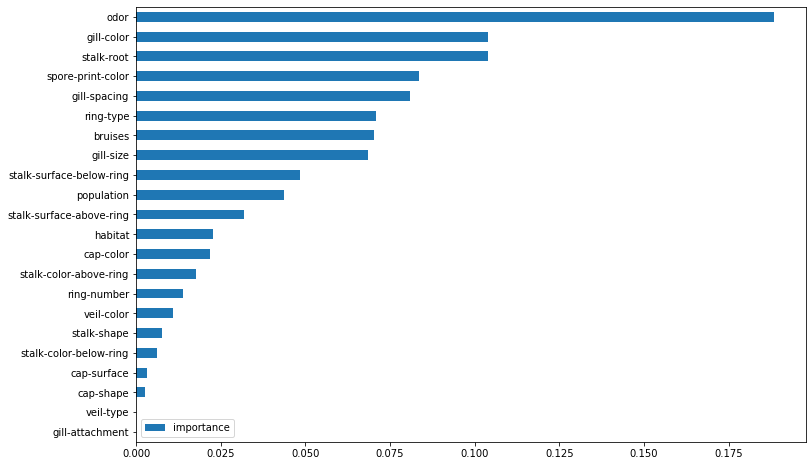

In [15]:
model = search.best_estimator_
imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [16]:
test_df = pd.read_csv('data/testing_mush.csv')

In [17]:
test_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [18]:
y_pred = model.predict(test_df)

In [20]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [23]:
y_true = pd.read_csv('data/testing_y_mush.csv')

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_true, y_pred)

array([[1055,    0],
       [   0,  976]])

In [26]:
df = pd.read_csv('data/invasion.csv')

In [27]:
df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [29]:
X_train = df.drop('class', axis=1)

In [30]:
y_train = df['class']

In [31]:
X_test = pd.read_csv('data/operative_information.csv')

In [32]:
clf = RandomForestClassifier(random_state=0)
params = {
    'n_estimators': range(10, 51, 10),
    'max_depth': range(1, 13, 2),
    'min_samples_leaf': range(1, 7),
    'min_samples_split': range(2, 10, 2)
}
search = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [33]:
y_pred = search.best_estimator_.predict(X_test)

In [34]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

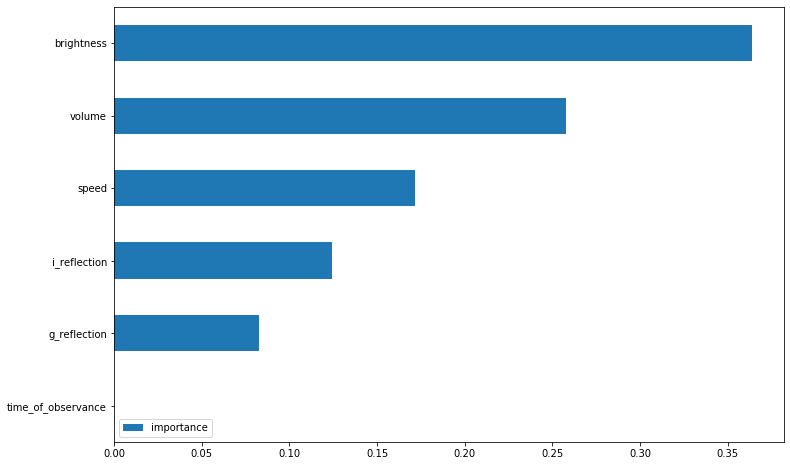

In [36]:
imp = pd.DataFrame(search.best_estimator_.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [38]:
df = pd.read_csv('data/space_can_be_a_dangerous_place.csv')

In [39]:
df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [40]:
df.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


## Pandas

In [41]:
df = pd.read_csv('data/iris.csv')

In [42]:
%%timeit
df.mean(axis=0)

237 µs ± 8.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%%timeit
df.apply('mean')

308 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
%%timeit
df.apply(np.mean)

1.13 ms ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [45]:
%%timeit
df.describe().loc['mean']

10.9 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [49]:
df['sepal length'].expanding().mean()[:5]

0    5.100
1    5.000
2    4.900
3    4.825
4    4.860
Name: sepal length, dtype: float64